In [2]:
library(ggplot2)
library(dplyr)
library(ggrepel)
library(purrr)
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
Ath_TF_list <- read.csv('./scan_motif/Ath_TF_list.txt', sep = '\t') %>% select(Gene_ID, Family) %>% distinct

In [4]:
Ath_TF_list_duplicated <- Ath_TF_list %>% filter( Gene_ID %in% 
        (Ath_TF_list %>% group_by(Gene_ID) %>% summarize(n = n()) %>% arrange(desc(n)) %>% filter(n > 1)  %>% pull(Gene_ID))
                       ) %>% arrange(Gene_ID)

In [5]:
Ath_TF_list <- Ath_TF_list %>% filter( ! Gene_ID %in% Ath_TF_list_duplicated$Gene_ID)  %>% rbind(Ath_TF_list_duplicated %>% filter(!Family %in% c('MYB_related', 'CO-like', 'AP2')))

In [6]:
Ath_TF_list

Gene_ID,Family
<chr>,<chr>
AT3G25730,RAV
AT1G68840,RAV
AT1G13260,RAV
AT1G25560,RAV
AT1G50680,RAV
AT1G51120,RAV
AT1G01010,NAC
AT1G01260,bHLH
AT1G01720,NAC


In [7]:
source('../gene_table_and_other_scripts/theme_Publication.R')

Registering fonts with R

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont(

In [8]:
map_id_name <- read.csv('../gene_table_and_other_scripts/bioMartR_Ath_all_genes_info_googled.csv')
map_id_name <- map_id_name %>% dplyr::rename('gene_name' = 'external_gene_name', 'gene_id' = 'ensembl_gene_id')
sample_n(map_id_name, 2)

gene_id,gene_name
<chr>,<chr>
AT5G58180,ATYKT62
AT4G20940,GHR1


In [9]:
diffTF_result <- read.csv(
    '/media/HDD2/donghui/diffTF_ath/diffTF/example/stable/output_2DMs_correct/FINAL_OUTPUT/extension100/COLvsDM.all.summary.tsv',
    sep = '\t') %>% arrange(pvalueAdj) %>% left_join(map_id_name, by = c('TF' = 'gene_id'))

In [10]:
#COLvsDM means COL is base

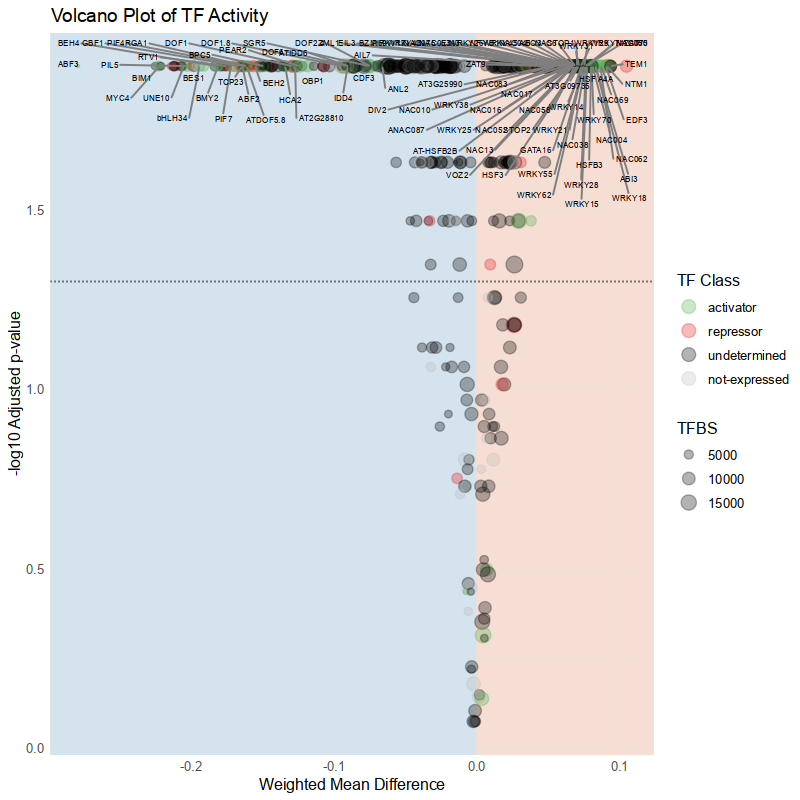

In [11]:
library(ggplot2)
library(dplyr)
library(ggrepel)
options(repr.plot.width= 8, repr.plot.height= 8, repr.plot.res = 100)
# Assuming 'df' is your dataframe name and it's already loaded in your environment
# Update the variable names and factors based on your specific dataframe

# Transforming p-values to a log scale for the plot and adding classifications
diffTF_result <- diffTF_result %>%
  mutate(
    pValueAdj_log10 = -log10(pvalueAdj + 1e-10), # Adjusting p-values
    significant = pvalueAdj < 0.05, # Define your significance level here
    TF_class = factor(classification_q0.001_final, levels = c("activator", "repressor", "undetermined", "not-expressed")), # Use the correct column name
    rank_pValueAdj_log10 = rank(-pValueAdj_log10) # Add this line to rank p-values
  )
# df
# Define the colors for the different classes
color_categories <- c("activator" = "#4daf4a", "repressor" = "#e41a1c", "undetermined" = "black", "not-expressed" = "grey")

# Plot with background color for weighted mean difference
plot <- ggplot(diffTF_result, aes(x = weighted_meanDifference, y = pValueAdj_log10)) +
  geom_rect(xmin = -Inf, xmax = 0, ymin = -Inf, ymax = Inf, fill = "#D6E5EF", alpha = 0.2) +  # Blue background for COL
  geom_rect(xmin = 0, xmax = Inf, ymin = -Inf, ymax = Inf, fill = "#F6DDD2", alpha = 0.2) +  # Red background for DM
  geom_point(aes(color = TF_class, size = TFBS), alpha = 0.3) +

  scale_color_manual(values = color_categories) +
  scale_size_continuous(name = "TFBS", range = c(0.1, 5)) +
  geom_hline(yintercept = -log10(0.05), linetype = "dotted") +  # Significance threshold line
  theme_minimal() +
  labs(title = 'Volcano Plot of TF Activity', x = 'Weighted Mean Difference', y = '-log10 Adjusted p-value') +
  theme(legend.position = "right") +
  guides(color = guide_legend(title = "TF Class", override.aes = list(size = 4)),
         size = guide_legend(title = "TFBS"))

plot <- plot +
  geom_text_repel(
    aes(label = ifelse(TF_class == "activator" & rank_pValueAdj_log10 <= 400 &
                    weighted_meanDifference %>% abs() > 0.05, 
                       as.character(gene_name), "")),
    size = 2,  # Adjust text size as needed
    max.overlaps = Inf,  # Allow for an infinite number of overlaps
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0, "lines"),
    segment.color = 'grey50'
  )


plot
# Save the plot if needed
# ggsave("improved_volcano_plot.pdf", width = 10, height = 8, dpi = 300)


In [12]:
diffTF_result %>% names

[1] "TF"                          "weighted_meanDifference"    
 [3] "weighted_CD"                 "TFBS"                       
 [5] "weighted_Tstat"              "variance"                   
 [7] "pvalue"                      "Cohend_factor"              
 [9] "pvalueAdj"                   "median.cor.tfs"             
[11] "classification_q0.1"         "classification_q0.05"       
[13] "classification_q0.01"        "classification_q0.001"      
[15] "classification_distr_rawP"   "classification_q0.1_final"  
[17] "classification_q0.05_final"  "classification_q0.01_final" 
[19] "classification_q0.001_final" "gene_name"                  
[21] "pValueAdj_log10"             "significant"                
[23] "TF_class"                    "rank_pValueAdj_log10"

In [13]:
diffTF_result_simplified <- diffTF_result %>% select( TF, TF_class, weighted_meanDifference, TFBS, pvalueAdj) %>% 
    filter(pvalueAdj < 0.05)
diffTF_result_simplified

TF,TF_class,weighted_meanDifference,TFBS,pvalueAdj
<chr>,<fct>,<dbl>,<int>,<dbl>
AT1G01250,undetermined,-0.02740,6948,0.01256585
AT1G01260,undetermined,-0.20600,4338,0.01256585
AT1G01720,undetermined,0.03200,5237,0.01256585
AT1G02230,activator,0.08120,8667,0.01256585
AT1G02250,activator,0.07810,10067,0.01256585
AT1G03800,undetermined,-0.03250,10741,0.01256585
AT1G03840,undetermined,-0.05000,15463,0.01256585
AT1G06070,activator,0.06120,4843,0.01256585
AT1G06850,undetermined,0.03870,4813,0.01256585


In [14]:
library(stringr)

In [15]:
# Define the path to the directory containing the subdirectories
base_path <- './NLRs_LRRs'
# base_path <- './WGCNA_ATAC_integration/ame_results_with_control/'

# List all subdirectories in the base_path
sub_dirs <- list.dirs(path = base_path, full.names = TRUE, recursive = FALSE)

read_and_prepare <- function(dir_path) {
  file_path <- file.path(dir_path, 'ame.tsv')
  
  # Check if the TSV file exists
  if (file.exists(file_path)) {
    data <- read_tsv(file_path, col_types = cols()) 
    
    # Check if data is a data frame and if it's not empty
    if (is.data.frame(data) && nrow(data) > 0) {
      # Check if the 'rank' column exists
      if ("rank" %in% names(data)) {
        # Proceed with filtering and mutating
        data <- data %>% 
          filter(str_detect(rank, '^\\d')) %>% 
          mutate(module = basename(dir_path))
        return(data)
      } else {
        # If 'rank' column doesn't exist, return a message or handle accordingly
        warning(paste("The 'rank' column does not exist in the file:", file_path))
        return(tibble())
      }
    } else {
      # Return an empty tibble if the data frame is empty or not a data frame
      return(tibble())
    }
  } else {
    # File does not exist, return an empty tibble
    return(tibble())
  }
}


# Apply the function to each subdirectory and combine the results
ame_result <- map_dfr(sub_dirs, read_and_prepare) %>% mutate(motif_DB = motif_DB %>% str_remove('/data/scan_motif/Ath_TF_binding_motifs_') %>% str_remove('.meme'))
# ame_result
# combined_data now contains all the data combined from each subdirectory
ame_result <- ame_result %>% left_join(map_id_name, by = c('motif_ID' = 'gene_id')) %>%
    mutate(motif_DB = motif_DB %>% str_remove('/data/scan_motif/Ath_TF_binding_motifs_')) %>%
    arrange(`adj_p-value`) %>% select(motif_ID, motif_alt_ID, consensus, `adj_p-value`, module ) %>% 
    dplyr::rename( 'enriched_module' = module) 

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or mo

In [16]:
ame_result <- ame_result %>% left_join(Ath_TF_list, by = c('motif_ID' = 'Gene_ID')) %>%
    left_join(map_id_name, by = c('motif_ID' = 'gene_id')) 

In [17]:
ame_result %>% filter(enriched_module == 'all_NLRs_up_vs_down')

motif_ID,motif_alt_ID,consensus,adj_p-value,enriched_module,Family,gene_name
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
AT5G46350,MP00545,NAAAAAGTCAACGNH,0.000587,all_NLRs_up_vs_down,WRKY,WRKY8
AT3G01970,MP00325,CGTTGACTTTTT,0.000745,all_NLRs_up_vs_down,WRKY,WRKY45
AT1G29860,MP00168,AAAAGTCAACG,0.001520,all_NLRs_up_vs_down,WRKY,WRKY71
AT2G46400,MP00112,MAAAGTCAACG,0.002290,all_NLRs_up_vs_down,WRKY,WRKY46
AT2G30590,MP00284,AAAAGTCAACG,0.002940,all_NLRs_up_vs_down,WRKY,WRKY21
AT4G01250,MP00422,AAAAGTCAACKNH,0.003400,all_NLRs_up_vs_down,WRKY,WRKY22
AT5G13790,MP00508,NTTTCCWTTTTDGGWAANT,0.004200,all_NLRs_up_vs_down,MIKC_MADS,AGL15
AT3G56400,MP00408,DNCGTTGACTTTT,0.004210,all_NLRs_up_vs_down,WRKY,WRKY70
AT2G46830,MP00103,AAATATCT,0.005110,all_NLRs_up_vs_down,MYB_related,CCA1


In [18]:
read_and_prepare_sequences <- function(dir_path) {
  file_path <- file.path(dir_path, 'sequences.tsv')
  
  # Check if the TSV file exists
  if (file.exists(file_path)) {
    data <- read_tsv(file_path, col_types = cols())
    
    # Check if data is a data frame and if it's not empty
    if (is.data.frame(data) && nrow(data) > 0) {
      # Perform any required filtering and mutation
      # For example, you might want to mutate the motif_DB column as you did before
      data <- data %>% 
        mutate(motif_DB = str_remove(motif_DB, '/data/scan_motif/Ath_TF_binding_motifs_'),
               enriched_module = basename(dir_path))
      return(data)
    } else {
      # Return an empty tibble if the data frame is empty or not a data frame
      return(tibble())
    }
  } else {
    # File does not exist, return an empty tibble
    return(tibble())
  }
}

# Apply the function to each subdirectory and combine the results
sequences_result <- map_dfr(sub_dirs, read_and_prepare_sequences)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


In [19]:
sequences_result <- sequences_result %>% filter(class == 'tp') %>% mutate(target = str_extract(seq_ID, '^AT\\dG\\d{5}')) %>%
    left_join(map_id_name %>% dplyr::rename(target_name = gene_name), by = c('target' = 'gene_id')) %>%
    left_join(Ath_TF_list %>% dplyr::rename(motif_Family = Family), by = c('motif_ID' = 'Gene_ID')) %>%
    left_join(map_id_name %>%  dplyr::rename(motif_name = gene_name), by = c('motif_ID' = 'gene_id')) %>% 
    select(c( "motif_ID", "motif_Family", "motif_name", "motif_ALT_ID", "seq_ID", "FASTA_score", "PWM_score",  "enriched_module", "target", "target_name"))

In [20]:
sequences_result <- sequences_result %>% left_join(diffTF_result_simplified, by = c('motif_ID' = 'TF'))

In [21]:
sequences_result$enriched_module %>% unique()

[1] "all_LRRs_down"       "all_LRRs_down_vs_up" "all_LRRs_up"        
[4] "all_LRRs_up_vs_down" "all_NLRs_down"       "all_NLRs_down_vs_up"
[7] "all_NLRs_up"         "all_NLRs_up_vs_down"

In [22]:
Res_DM1_DM2d <- readRDS('../3DM_shoot/Rds_Rdata/Res_3DM.2023-04-21 14:05:06rds') %>% filter(contrast %>% str_detect('DM1/DM2d')) %>% select(AGI, log2FoldChange)

In [23]:
sequences_result <- sequences_result %>% left_join(Res_DM1_DM2d %>% dplyr::rename(log2FoldChange_TF = log2FoldChange), by = c('motif_ID' = 'AGI')) %>% left_join(Res_DM1_DM2d %>% dplyr::rename(log2FoldChange_target = log2FoldChange), by = c('target' = 'AGI'))

In [24]:
sequences_result %>% filter(enriched_module == 'all_NLRs_up_vs_down') %>% group_by(motif_name) %>% tally()

motif_name,n
<chr>,<int>
AGL15,17
AT3G10113,16
CCA1,18
GATA9,20
LCL1,12
RVE6,12
RVE8,12
WRKY11,10
WRKY14,15


In [25]:
sequences_result %>% filter(enriched_module == 'all_NLRs_up_vs_down') %>% group_by(target_name) %>% tally() %>% arrange(-n)

target_name,n
<chr>,<int>
AT4G19520,28
ADR1,23
ADR1-L1,22
AT5G46260,17
AT1G63740,16
AT1G65850,16
CHS1,16
TN3,16
TNL60,16


In [26]:
sequences_result %>% filter(enriched_module == 'all_NLRs_up_vs_down') %>% group_by(motif_name) %>% tally() %>% arrange(-n)

motif_name,n
<chr>,<int>
GATA9,20
WRKY71,20
WRKY29,19
CCA1,18
WRKY21,18
AGL15,17
WRKY45,17
WRKY8,17
AT3G10113,16


In [27]:
sequences_result %>% filter(enriched_module == 'all_LRRs_up_vs_down') %>% group_by(motif_name) %>% tally() %>% arrange(-n)

motif_name,n
<chr>,<int>
WRKY57,40
WRKY28,36
WRKY15,28
WRKY20,27
WRKY46,26
WRKY47,23
WRKY55,23
WRKY11,22
WRKY65,22


In [28]:
sequences_result %>% filter(enriched_module == 'all_LRRs_down_vs_up') %>% group_by(motif_name) %>% tally() %>% arrange(-n)

motif_name,n
<chr>,<int>
STZ,32


In [29]:
sequences_result %>% filter(enriched_module %in% c('all_NLRs_up_vs_down', 'all_LRRs_up_vs_down')) %>%
    filter( target_name == 'ADR1')

motif_ID,motif_Family,motif_name,motif_ALT_ID,seq_ID,FASTA_score,PWM_score,enriched_module,target,target_name,TF_class,weighted_meanDifference,TFBS,pvalueAdj,log2FoldChange_TF,log2FoldChange_target
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
AT1G29860,WRKY,WRKY71,MP00168,AT1G33560_1_12167574_12168743,8,11.09960,all_NLRs_up_vs_down,AT1G33560,ADR1,activator,0.0753,10786,0.01256585,2.7143628,3.177141
AT1G30650,WRKY,WRKY14,MP00171,AT1G33560_1_12167574_12168743,8,9.27845,all_NLRs_up_vs_down,AT1G33560,ADR1,activator,0.0750,9724,0.01256585,2.4018648,3.177141
AT2G23320,WRKY,WRKY15,MP00275,AT1G33560_1_12167574_12168743,8,12.37330,all_NLRs_up_vs_down,AT1G33560,ADR1,activator,0.0774,10239,0.01256585,1.6716719,3.177141
AT2G30590,WRKY,WRKY21,MP00284,AT1G33560_1_12167574_12168743,8,14.99460,all_NLRs_up_vs_down,AT1G33560,ADR1,activator,0.0735,10429,0.01256585,0.7618129,3.177141
AT2G46400,WRKY,WRKY46,MP00112,AT1G33560_1_12167574_12168743,8,5.23632,all_NLRs_up_vs_down,AT1G33560,ADR1,activator,0.0614,9552,0.01256585,3.7634672,3.177141
AT2G46830,MYB_related,CCA1,MP00103,AT1G33560_1_12168768_12169601,10,9.02413,all_NLRs_up_vs_down,AT1G33560,ADR1,NA,NA,NA,NA,-0.7075434,3.177141
AT3G01970,WRKY,WRKY45,MP00325,AT1G33560_1_12167574_12168743,8,5.13439,all_NLRs_up_vs_down,AT1G33560,ADR1,activator,0.0677,11259,0.01256585,3.4019531,3.177141
AT3G09600,MYB_related,RVE8,MP00338,AT1G33560_1_12168768_12169601,10,6.18475,all_NLRs_up_vs_down,AT1G33560,ADR1,undetermined,-0.0291,10098,0.01256585,2.1354959,3.177141
AT3G10113,MYB_related,AT3G10113,MP00341,AT1G33560_1_12167574_12168743,8,5.09192,all_NLRs_up_vs_down,AT1G33560,ADR1,undetermined,-0.0180,9968,0.01256585,-1.9652888,3.177141


In [30]:
sequences_result %>% filter(enriched_module %in% c( 'all_LRRs_up_vs_down')) %>% arrange(-FASTA_score)

motif_ID,motif_Family,motif_name,motif_ALT_ID,seq_ID,FASTA_score,PWM_score,enriched_module,target,target_name,TF_class,weighted_meanDifference,TFBS,pvalueAdj,log2FoldChange_TF,log2FoldChange_target
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
AT1G69310,WRKY,WRKY57,MP00067,AT3G23110_3_8225458_8225701,79,2.48859,all_LRRs_up_vs_down,AT3G23110,RLP37,undetermined,0.0748,9164,0.01256585,2.1030434,1.921206
AT1G80840,WRKY,WRKY40,MP00251,AT3G23110_3_8225458_8225701,79,23.08630,all_LRRs_up_vs_down,AT3G23110,RLP37,undetermined,0.0806,11684,0.01256585,0.4531164,1.921206
AT4G18170,WRKY,WRKY28,MP00440,AT3G23110_3_8225458_8225701,79,1.78854,all_LRRs_up_vs_down,AT3G23110,RLP37,activator,0.0765,11177,0.01256585,1.1708943,1.921206
AT1G69310,WRKY,WRKY57,MP00067,AT3G23110_3_8224981_8225195,78,2.80312,all_LRRs_up_vs_down,AT3G23110,RLP37,undetermined,0.0748,9164,0.01256585,2.1030434,1.921206
AT1G80840,WRKY,WRKY40,MP00251,AT3G23110_3_8224981_8225195,78,9.51282,all_LRRs_up_vs_down,AT3G23110,RLP37,undetermined,0.0806,11684,0.01256585,0.4531164,1.921206
AT4G18170,WRKY,WRKY28,MP00440,AT3G23110_3_8224981_8225195,78,2.22366,all_LRRs_up_vs_down,AT3G23110,RLP37,activator,0.0765,11177,0.01256585,1.1708943,1.921206
AT4G31550,WRKY,WRKY11,MP00464,AT3G23110_3_8224981_8225195,78,1.64050,all_LRRs_up_vs_down,AT3G23110,RLP37,undetermined,0.0719,10537,0.01256585,-0.1508441,1.921206
AT4G01280,MYB_related,RVE5,MP00423,AT3G24900_3_9099121_9100646,76,1.69288,all_LRRs_up_vs_down,AT3G24900,RLP39,undetermined,-0.0487,11044,0.01256585,0.5724642,3.377886
AT1G29280,WRKY,WRKY65,MP00167,AT2G32680_2_13860962_13862444,75,6.36715,all_LRRs_up_vs_down,AT2G32680,RLP23,undetermined,0.0761,9377,0.01256585,-0.8915306,2.787936


In [31]:
sequences_result_LRR_NLRs_up_vs_down <- sequences_result %>% filter(enriched_module %in% c('all_NLRs_up_vs_down', 'all_LRRs_up_vs_down'))

In [32]:
TFs_nodes <- sequences_result_LRR_NLRs_up_vs_down %>% dplyr::select(motif_ID, motif_Family, motif_name, log2FoldChange_TF) %>%
    dplyr::rename(ID = motif_ID, gene_name = motif_name, log2FoldChange_DM1_2d_vs_Col_14 = log2FoldChange_TF, subgroup = motif_Family) %>% mutate(group = 'TF') 

In [33]:
NLRs_and_LRRs <- readRDS(file.path('./NLRs_LRRs', "NLRs_and_LRRs_list.rds"))
NLRs_and_LRRs

AGI,subClass,Class
<chr>,<chr>,<chr>
AT1G51820,LRR-RLKs,LRR
AT2G19190,LRR-RLKs,LRR
AT1G17750,LRR-RLKs,LRR
AT1G55610,LRR-RLKs,LRR
AT1G51890,LRR-RLKs,LRR
AT1G74360,LRR-RLKs,LRR
AT1G73080,LRR-RLKs,LRR
AT3G13380,LRR-RLKs,LRR
AT1G56140,LRR-RLKs,LRR


In [34]:
targets_nodes <- sequences_result_LRR_NLRs_up_vs_down %>% dplyr::select(target, target_name, log2FoldChange_target) %>% 
    dplyr::rename(ID = target, gene_name = target_name, log2FoldChange_DM1_2d_vs_Col_14 = log2FoldChange_target) %>%  
    left_join(NLRs_and_LRRs , by = c('ID' = 'AGI')) %>% dplyr::rename(subgroup = subClass, group = Class)

In [35]:
nodes <- targets_nodes %>% rbind(TFs_nodes) %>% distinct() %>% dplyr::rename(log2FoldChange = log2FoldChange_DM1_2d_vs_Col_14)%>% filter(abs(log2FoldChange) > 1)

In [36]:
edges <- sequences_result_LRR_NLRs_up_vs_down %>% 
    dplyr::select(motif_ID, target, TF_class) %>% 
    dplyr::rename(source = motif_ID, interaction = TF_class) %>% distinct()
edges

source,target,interaction
<chr>,<chr>,<fct>
AT1G01060,AT4G39270,undetermined
AT1G01060,AT1G51850,undetermined
AT1G01060,AT5G49760,undetermined
AT1G01060,AT1G74360,undetermined
AT1G01060,AT1G47890,undetermined
AT1G01060,AT1G51790,undetermined
AT1G01060,AT5G59670,undetermined
AT1G01060,AT1G55610,undetermined
AT1G01060,AT2G32680,undetermined


In [37]:
nodes %>% write.csv('./NLRs_LRRs/nodes.csv', row.names = FALSE, quote=FALSE)
edges %>% write.csv('./NLRs_LRRs/edges.csv', row.names = FALSE, quote=FALSE)

In [42]:
diffTF_result_simplified %>% left_join(ame_result, by = c('TF' = 'motif_ID')) %>% 
    left_join(map_id_name, by = c('TF' = 'gene_id')) %>%  filter(!is.na(enriched_module)) %>% select(-TFBS) %>% 
    left_join(sequences_result, by = c('TF' = 'motif_ID', 'enriched_module' = 'enriched_module')) %>%
    left_join(Ath_TF_list %>% select(Gene_ID, Family), by = c('TF' = 'Gene_ID'))


TF,TF_class.x,weighted_meanDifference.x,pvalueAdj.x,motif_alt_ID,consensus,adj_p-value,enriched_module,Family.x,gene_name.x,⋯,PWM_score,target,target_name,TF_class.y,weighted_meanDifference.y,TFBS,pvalueAdj.y,log2FoldChange_TF,log2FoldChange_target,Family.y
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,94.47710,AT1G12460,AT1G12460,undetermined,-0.2060,4338,0.01256585,-0.03388804,-3.619635,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,92.98780,AT4G22730,AT4G22730,undetermined,-0.2060,4338,0.01256585,-0.03388804,-1.759653,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,48.56030,AT2G35620,FEI2,undetermined,-0.2060,4338,0.01256585,-0.03388804,-2.437836,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,46.01850,AT1G67510,AT1G67510,undetermined,-0.2060,4338,0.01256585,-0.03388804,-1.623084,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,31.58890,AT5G56040,SKM2,undetermined,-0.2060,4338,0.01256585,-0.03388804,-2.750108,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,11.39930,AT4G37250,AT4G37250,undetermined,-0.2060,4338,0.01256585,-0.03388804,-1.235190,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,10.46230,AT3G56370,IRK,undetermined,-0.2060,4338,0.01256585,-0.03388804,-3.454642,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,8.36433,AT5G56040,SKM2,undetermined,-0.2060,4338,0.01256585,-0.03388804,-2.750108,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,6.13865,AT4G36180,MUL,undetermined,-0.2060,4338,0.01256585,-0.03388804,-2.480062,bHLH


In [45]:
diffTF_AME_WGCNA_modules <- diffTF_result_simplified %>% left_join(ame_result, by = c('TF' = 'motif_ID')) %>% 
    left_join(map_id_name, by = c('TF' = 'gene_id')) %>%  filter(!is.na(enriched_module)) %>% select(-TFBS) %>% 
    left_join(sequences_result, by = c('TF' = 'motif_ID', #'TF', 
                                       'enriched_module' = 'enriched_module')) %>% 
    left_join(Ath_TF_list %>% select(Gene_ID, Family), by = c('TF' = 'Gene_ID'))
diffTF_AME_WGCNA_modules 

TF,TF_class.x,weighted_meanDifference.x,pvalueAdj.x,motif_alt_ID,consensus,adj_p-value,enriched_module,Family.x,gene_name.x,⋯,PWM_score,target,target_name,TF_class.y,weighted_meanDifference.y,TFBS,pvalueAdj.y,log2FoldChange_TF,log2FoldChange_target,Family.y
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,94.47710,AT1G12460,AT1G12460,undetermined,-0.2060,4338,0.01256585,-0.03388804,-3.619635,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,92.98780,AT4G22730,AT4G22730,undetermined,-0.2060,4338,0.01256585,-0.03388804,-1.759653,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,48.56030,AT2G35620,FEI2,undetermined,-0.2060,4338,0.01256585,-0.03388804,-2.437836,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,46.01850,AT1G67510,AT1G67510,undetermined,-0.2060,4338,0.01256585,-0.03388804,-1.623084,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,31.58890,AT5G56040,SKM2,undetermined,-0.2060,4338,0.01256585,-0.03388804,-2.750108,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,11.39930,AT4G37250,AT4G37250,undetermined,-0.2060,4338,0.01256585,-0.03388804,-1.235190,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,10.46230,AT3G56370,IRK,undetermined,-0.2060,4338,0.01256585,-0.03388804,-3.454642,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,8.36433,AT5G56040,SKM2,undetermined,-0.2060,4338,0.01256585,-0.03388804,-2.750108,bHLH
AT1G01260,undetermined,-0.2060,0.01256585,MP00100,RCACGTGC,5.13e-03,all_LRRs_down,bHLH,JAM2,⋯,6.13865,AT4G36180,MUL,undetermined,-0.2060,4338,0.01256585,-0.03388804,-2.480062,bHLH


In [46]:
diffTF_AME_WGCNA_modules_L2fold <- diffTF_AME_WGCNA_modules %>% left_join(Res_DM1_DM2d, by = c('TF' = 'AGI' )) %>% 
    filter(abs(log2FoldChange) > 2) %>% rename(log2FoldChange_DM1_2d_vs_Col_14 = log2FoldChange)
diffTF_AME_WGCNA_modules_L2fold

TF,TF_class.x,weighted_meanDifference.x,pvalueAdj.x,motif_alt_ID,consensus,adj_p-value,enriched_module,Family.x,gene_name.x,⋯,target,target_name,TF_class.y,weighted_meanDifference.y,TFBS,pvalueAdj.y,log2FoldChange_TF,log2FoldChange_target,Family.y,log2FoldChange_DM1_2d_vs_Col_14
<chr>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
AT1G18330,undetermined,-0.0294,0.01256585,MP00146,RAAAATATCTWA,0.002460,all_LRRs_up_vs_down,MYB_related,EPR1,⋯,AT1G51850,SIF2,undetermined,-0.0294,9382,0.01256585,-2.914736,1.658845,MYB_related,-2.914736
AT1G18330,undetermined,-0.0294,0.01256585,MP00146,RAAAATATCTWA,0.002460,all_LRRs_up_vs_down,MYB_related,EPR1,⋯,AT4G39270,AT4G39270,undetermined,-0.0294,9382,0.01256585,-2.914736,1.790699,MYB_related,-2.914736
AT1G18330,undetermined,-0.0294,0.01256585,MP00146,RAAAATATCTWA,0.002460,all_LRRs_up_vs_down,MYB_related,EPR1,⋯,AT1G47890,RLP7,undetermined,-0.0294,9382,0.01256585,-2.914736,6.984235,MYB_related,-2.914736
AT1G18330,undetermined,-0.0294,0.01256585,MP00146,RAAAATATCTWA,0.002460,all_LRRs_up_vs_down,MYB_related,EPR1,⋯,AT5G49760,HPCA1,undetermined,-0.0294,9382,0.01256585,-2.914736,1.198235,MYB_related,-2.914736
AT1G18330,undetermined,-0.0294,0.01256585,MP00146,RAAAATATCTWA,0.002460,all_LRRs_up_vs_down,MYB_related,EPR1,⋯,AT1G74360,NILR1,undetermined,-0.0294,9382,0.01256585,-2.914736,4.299102,MYB_related,-2.914736
AT1G18330,undetermined,-0.0294,0.01256585,MP00146,RAAAATATCTWA,0.002460,all_LRRs_up_vs_down,MYB_related,EPR1,⋯,AT5G59670,AT5G59670,undetermined,-0.0294,9382,0.01256585,-2.914736,3.461644,MYB_related,-2.914736
AT1G18330,undetermined,-0.0294,0.01256585,MP00146,RAAAATATCTWA,0.002460,all_LRRs_up_vs_down,MYB_related,EPR1,⋯,AT1G55610,BRL1,undetermined,-0.0294,9382,0.01256585,-2.914736,5.013700,MYB_related,-2.914736
AT1G18330,undetermined,-0.0294,0.01256585,MP00146,RAAAATATCTWA,0.002460,all_LRRs_up_vs_down,MYB_related,EPR1,⋯,AT3G02880,KIN7,undetermined,-0.0294,9382,0.01256585,-2.914736,2.328084,MYB_related,-2.914736
AT1G18330,undetermined,-0.0294,0.01256585,MP00146,RAAAATATCTWA,0.002460,all_LRRs_up_vs_down,MYB_related,EPR1,⋯,AT5G45800,MEE62,undetermined,-0.0294,9382,0.01256585,-2.914736,1.522967,MYB_related,-2.914736


In [47]:
library(openxlsx)
library(dplyr)

# Define your color categories for the 'TF_class' column
color_categories <- c(
  "activator" = "#4daf4a", 
  "repressor" = "#d15859", 
  "undetermined" = "#95B2DE", 
  "not-expressed" = "grey"
)

# Create a new workbook
wb <- createWorkbook()

# Define the color mapping for the sheet tabs based on the module names
tab_colors <- c(
  "MEblue" = "#0000FF",
  "MEcyan" = "#00FFFF",
  "MEpurple" = "#800080",
  "MEtan" = "#D2B48C",
  "MEdarkgreen" = "#006400",
  "MEdarkred" = "#8B0000",
  "MEmidnightblue" = "#191970",
  "MEgreenyellow" = "#ADFF2F",
  "MEsalmon" = "#FA8072",
  "MEdarkturquoise" = "#00CED1"
)

df_to_write = diffTF_AME_WGCNA_modules_L2fold
# Loop through unique modules
for (i in unique(df_to_write$enriched_module)) {
    print(paste("Processing module:", i))
    # Add a worksheet for each module
    sheet_name <- i # Keep the 'ME' in the sheet name
    tab_color <- tab_colors[[sheet_name]] # Get the tab color for this module
    
    addWorksheet(wb, sheetName = sheet_name, tabColour = tab_color)
    
    # Get the data for the current module and arrange it
    module_data <- df_to_write %>% 
      filter(enriched_module == i) %>% 
      arrange(`adj_p-value`) 
    
    # Write the data to the worksheet
    writeData(wb, sheet_name, module_data)
    
    # Get the number of rows of data to determine where to apply styles
    num_rows <- nrow(module_data)
    
    # Apply styles to 'TF_class' column based on the color_categories
    if ("TF_class" %in% names(module_data)) {
      tf_class_col <- which(names(module_data) == "TF_class")
      for (row in 1:num_rows) {
        tf_class_value <- module_data[[row, "TF_class"]]
        if (!is.na(tf_class_value) && tf_class_value %in% names(color_categories)) {
          cell_style <- createStyle(fgFill = color_categories[tf_class_value])
          addStyle(wb, sheet = sheet_name, style = cell_style, rows = row + 1, cols = tf_class_col, gridExpand = TRUE)
        }
      }
    }
}

# Save the workbook
saveWorkbook(wb, file = "diffbind_results_2DM/motifs_and_classification2.xlsx", overwrite = TRUE)
diffTF_AME_WGCNA_modules_L2fold %>% write.csv('diffbind_results_2DM/diffTF_AME_WGCNA_modules_L2fold.csv')

[1] "Processing module: all_LRRs_up_vs_down"


ERROR: Error in tab_colors[[sheet_name]]: subscript out of bounds


### Write out csv for Cytoscape

In [48]:
# First dataframe
df1 <- diffTF_AME_WGCNA_modules_L2fold %>% 
select(TF, gene_name, TF_class, Family, pvalueAdj, consensus, log2FoldChange_DM1_2d_vs_Col_14) %>% 
dplyr::rename(ID = TF) %>% 
mutate(group = 'TF') %>% mutate(subgroup = Family) 

# Second dataframe with additional columns filled with NA to match df1
df2 <- diffTF_AME_WGCNA_modules_L2fold %>% 
select(enriched_module) %>% 
dplyr::rename(ID = enriched_module) %>% 
mutate(group = 'module', gene_name = ID, TF_class = NA, Family = 'module', pvalueAdj = NA, consensus = NA, log2FoldChange_DM1_2d_vs_Col_14 = NA) %>% distinct %>% mutate(subgroup = ID)

# Combine the dataframes
nodes <- rbind(df1, df2)  %>% distinct
nodes %>% write.csv('diffbind_results_2DM/nodes_diffTF_AME_WGCNA_modules_L2fold_abs.csv', row.names = FALSE)
nodes %>% nrow
nodes %>% sample_n(2)
# nodes  %>% filter(ID %>% str_detect('^AT')) %>% pull('ID')  %>% write.csv('diffbind_results_2DM/unique_TFs_abs.csv', row.names = FALSE)

edges <- diffTF_AME_WGCNA_modules_L2fold %>% select(TF, enriched_module, TF_class, TFBS) %>% 
    dplyr::rename(source = TF, target = enriched_module, interaction = TF_class, weight = TFBS ) 
edges %>% write.csv('diffbind_results_2DM/edges_diffTF_AME_WGCNA_modules_L2fold_abs.csv', row.names = FALSE)
edges %>% sample_n(2)


ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column `gene_name` doesn't exist.


### import ChromVar data3

In [ ]:
library(reshape2)
library(corrplot)

In [ ]:
Cor_matrix_all<- readRDS("./ChromVar/Rdata/Cor_matrix_all.rds")
Synergy_matrix_all <- readRDS("./ChromVar/Rdata/Synergy_matrix_all.rds")

In [ ]:
# Create a named vector for mapping
name_mapping <- setNames(map_id_name$gene_name, map_id_name$gene_id)
# name_mapping

In [ ]:
nodes_top2_each_Family <- nodes %>% filter(log2FoldChange_DM1_2d_vs_Col_14 > 3) %>% filter(ID %>% str_detect('^AT') )%>% group_by(Family) %>% 
    arrange(desc(log2FoldChange_DM1_2d_vs_Col_14)) %>% top_n(2, log2FoldChange_DM1_2d_vs_Col_14) %>% 
    arrange(Family)

In [ ]:
Cor_test <- Cor_matrix_all[nodes_top2_each_Family$ID, nodes_top2_each_Family$ID]
Syn_test <- Synergy_matrix_all[nodes_top2_each_Family$ID, nodes_top2_each_Family$ID]
rownames(Cor_test) <- name_mapping[rownames(Cor_test)]
colnames(Cor_test) <- name_mapping[colnames(Cor_test)]
rownames(Syn_test) <- name_mapping[rownames(Syn_test)]
colnames(Syn_test) <- name_mapping[colnames(Syn_test)]

In [ ]:
options(repr.plot.width= 8, repr.plot.height= 8, repr.plot.res = 100)
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'original', 
         col = myColors, 
         tl.col = 'black',

         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         
         number.digits = 1,
         number.font = 10,
         number.cex = 0.01, # Smaller font size for p-value
         
)

In [ ]:
options(repr.plot.width= 8, repr.plot.height= 8, repr.plot.res = 100)
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'hclust', 
         col = myColors, 
         tl.col = 'black',

         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         
         number.digits = 1,
         number.font = 10,
         number.cex = 0.01, # Smaller font size for p-value
         
)

In [ ]:
# Start capturing the plot output to a file
pdf("corrplot.pdf", width=8, height=8)

# Your existing corrplot code
myColors <- colorRampPalette(c("#5793B3", "white", "#CA5351"))(10)

corrplot(Cor_test, method = 'square', 
         p.mat = Syn_test, 
         insig = 'p-value', 
         sig.level = -100000, 
         order = 'original', 
         col = myColors, 
         tl.col = 'black',
         cl.cex = 0.8,
         tl.cex = 1,
         tl.pos = 'lt', # Labels at the bottom
         number.digits = 1,
         number.font = 10,
         number.cex = 0.1, # Smaller font size for p-value
)

# Stop capturing and save the plot
dev.off()

In [ ]:

data(mtcars)
M = cor(mtcars)
set.seed(0)


In [ ]:
allMotifs <- read.csv('/media/HDD2/donghui/diffTF_ath/diffTF/example/stable/output_2DMs_correct/FINAL_OUTPUT/extension100/COLvsDM.all.allMotifs.tsv', sep = '\t') 

In [ ]:
allMotifs %>% head

In [ ]:
allMotifs %>% filter(l2FC > 2) %>% nrow

In [ ]:
allMotifs %>% filter(l2FC < -2) %>% nrow

In [ ]:
allMotifs %>% filter(l2FC > 1) %>% nrow

##### l2FC here is the motif opening, DM vs WT

In [ ]:
library(ChIPseeker)
library(TxDb.Athaliana.BioMart.plantsmart51)

In [ ]:
library(dplyr)
library(GenomicRanges)

# Assuming your data frame is named allMotifs
# Extract and transform the necessary columns
allMotifs_transformed <- allMotifs %>%
  mutate(
    chr = gsub("chr", "", chr), # Remove 'chr' from chromosome column
    start = as.numeric(gsub(".*:(\\d+)-\\d+", "\\1", peakID)), # Extract start position
    end = as.numeric(gsub(".*:\\d+-(\\d+)", "\\1", peakID)) # Extract end position
  )

# Create a GRanges object
granges_obj <- GRanges(
  seqnames = Rle(allMotifs_transformed$chr),
  ranges = IRanges(start = allMotifs_transformed$start, end = allMotifs_transformed$end),
  strand = Rle(strand(allMotifs_transformed$strand))    
)

# Add TF as metadata
mcols(granges_obj)$TF <- allMotifs_transformed$TF
mcols(granges_obj)$peakID <- allMotifs_transformed$peakID

granges_obj

In [ ]:
# Annotate peaks
txdb <- TxDb.Athaliana.BioMart.plantsmart51
annotated_peaks <- annotatePeak(granges_obj, TxDb = txdb, level = "gene")

In [ ]:
TF_peak_annotated <- as_tibble(annotated_peaks@anno) %>% filter( distanceToTSS %>% abs() < 20000 )
TF_peak_annotated

In [ ]:
proportion_l2FC_per_TF <- allMotifs %>%
    filter(pval_adj < 0.05) %>% 
  group_by(TF) %>% 
  summarise(
    positive_peak = sum(l2FC > 0, na.rm = TRUE),
    negative_peak = sum(l2FC < 0, na.rm = TRUE),
    total_peak = n(),
    proportion_positive = positive_peak / total_peak,
    proportion_negative = negative_peak / total_peak
  )

In [ ]:
proportion_l2FC_per_TF %>% filter(TF == 'AT5G01900')

In [ ]:
connectivity_table_info <- readRDS('/media/HDD2/donghui/Pathogen_JC14_3DM/WGCNA_output_all/RDS/connectivity_info.rds')

In [ ]:
connectivity_table <- connectivity_table_info %>% dplyr::select(gene, connectivity_rowSums_adj, module, gene_name)

In [ ]:
TF_peak_annotated_in_WGCNA <- TF_peak_annotated %>% left_join(connectivity_table, by = c('geneId' = 'gene')) %>% filter( !is.na(module) ) 

In [ ]:
##peakID is contain the TFBS, which belong to geneID, geneID is in module
TF_peak_annotated_in_WGCNA <- TF_peak_annotated_in_WGCNA %>% dplyr::select(TF, peakID, geneId, connectivity_rowSums_adj, module  ) %>% left_join(allMotifs, by = c('TF' = 'TF','peakID' = 'peakID')) 

In [ ]:
TF_peak_annotated_in_WGCNA_meidan_l2FC <- TF_peak_annotated_in_WGCNA %>% 
     filter(pval_adj < 0.05) %>% 
      group_by(TF, module) %>%
  summarise(median_l2FC = median(l2FC, na.rm = TRUE),  
        positive_peak = sum(l2FC > 0, na.rm = TRUE),
        negative_peak = sum(l2FC < 0, na.rm = TRUE),
        total_peak = n(),
        proportion_positive = positive_peak / total_peak,
        proportion_negative = negative_peak / total_peak) %>% ungroup()

In [ ]:
connectivity_table %>% group_by(module) %>% tally %>% dplyr::rename('number_of_genes' = 'n')

In [ ]:
TF_peak_annotated_in_WGCNA_meidan_l2FC <- TF_peak_annotated_in_WGCNA %>% 
     filter(pval_adj < 0.05) %>% 
      group_by(TF, module) %>%
  summarise(median_l2FC = median(l2FC, na.rm = TRUE),  
        positive_peak = sum(l2FC > 0, na.rm = TRUE),
        negative_peak = sum(l2FC < 0, na.rm = TRUE),
        total_peak = n(),
        proportion_positive = positive_peak / total_peak,
        proportion_negative = negative_peak / total_peak) %>% ungroup() %>% left_join(
          connectivity_table %>% group_by(module) %>% tally %>% dplyr::rename('number_of_genes_in_module' = 'n'), by = 'module') %>% mutate(
      avg_peak_per_gene_in_module = total_peak / number_of_genes_in_module)

In [ ]:
TF_peak_annotated_in_WGCNA_meidan_l2FC%>% filter(TF == 'AT5G01900')

In [ ]:
TF_peak_annotated_in_WGCNA_meidan_l2FC%>% filter(TF == 'AT4G38000')

In [ ]:
TF_peak_annotated_in_WGCNA_meidan_l2FC%>% filter(TF == 'AT1G02250') #NAC

In [ ]:
# First dataframe
cutoff_l2f = 2

df1 <- diffTF_AME_WGCNA_modules_L2fold %>% filter(abs(log2FoldChange_DM1_2d_vs_Col_14) > cutoff_l2f) %>%
dplyr::select(TF, gene_name, TF_class, Family, pvalueAdj, consensus, log2FoldChange_DM1_2d_vs_Col_14) %>% 
dplyr::rename(ID = TF) %>% 
mutate(group = 'TF') %>% mutate(subgroup = Family) 

# Second dataframe with additional columns filled with NA to match df1
df2 <- diffTF_AME_WGCNA_modules_L2fold %>% 
dplyr::select(enriched_module) %>% 
dplyr::rename(ID = enriched_module) %>% 
mutate(group = 'module', gene_name = ID, TF_class = NA, Family = 'module', pvalueAdj = NA, consensus = NA, log2FoldChange_DM1_2d_vs_Col_14 = NA) %>% distinct %>% mutate(subgroup = ID)

# Combine the dataframes
nodes <- rbind(df1, df2)  %>% distinct %>% mutate(TF_class = as.character(TF_class), TF_class = 
                        ifelse(is.na(TF_class), subgroup, TF_class))

nodes %>% write.csv('diffbind_results_2DM/nodes_diffTF_AME_WGCNA_modules_L2fold_abs.csv', row.names = FALSE)
nodes %>% nrow
nodes %>% sample_n(2)
nodes  %>% filter(ID %>% str_detect('^AT')) %>% pull('ID')  %>% write.csv('diffbind_results_2DM/unique_TFs.csv', row.names = FALSE)

edges <- diffTF_AME_WGCNA_modules_L2fold %>%
    filter(abs(log2FoldChange_DM1_2d_vs_Col_14) > cutoff_l2f) %>% 
    dplyr::select(TF, enriched_module, TF_class, TFBS) %>% 
    dplyr::rename(source = TF, target = enriched_module, interaction = TF_class, weight = TFBS ) 

##add median_l2FC for each TF in each module
edges <- edges %>% left_join(TF_peak_annotated_in_WGCNA_meidan_l2FC %>% 
        dplyr::select(TF, module, median_l2FC) %>% ungroup,    by = c('source' = 'TF', 'target' = 'module'))

edges %>% write.csv('diffbind_results_2DM/edges_diffTF_AME_WGCNA_modules_L2fold_abs.csv', row.names = FALSE)
edges %>% sample_n(2)


In [ ]:
##remove 

cutoff_l2f = 2

# First dataframe
df1 <- diffTF_AME_WGCNA_modules_L2fold %>% filter(abs(log2FoldChange_DM1_2d_vs_Col_14) > cutoff_l2f) %>%
dplyr::filter( TF_class %>% str_detect('activator|repressor')) %>%
dplyr::select(TF, gene_name, TF_class, Family, pvalueAdj, consensus, log2FoldChange_DM1_2d_vs_Col_14) %>% 
dplyr::rename(ID = TF) %>% 
mutate(group = 'TF') %>% mutate(subgroup = Family) 

# Second dataframe with additional columns filled with NA to match df1
df2 <- diffTF_AME_WGCNA_modules_L2fold %>% 
dplyr::select(enriched_module) %>% 
dplyr::rename(ID = enriched_module) %>% 
mutate(group = 'module', gene_name = ID, TF_class = NA, Family = 'module', pvalueAdj = NA, consensus = NA, log2FoldChange_DM1_2d_vs_Col_14 = NA) %>% distinct %>% mutate(subgroup = ID)

# Combine the dataframes
nodes <- rbind(df1, df2)  %>% distinct %>% mutate(TF_class = as.character(TF_class), TF_class = 
                        ifelse(is.na(TF_class), subgroup, TF_class))

nodes %>% write.csv('diffbind_results_2DM/nodes_diffTF_AME_WGCNA_modules_L2fold_abs_repressor_activotor.csv', row.names = FALSE)
nodes %>% nrow
nodes %>% sample_n(2)
nodes  %>% filter(ID %>% str_detect('^AT')) %>% pull('ID')  %>% write.csv('diffbind_results_2DM/unique_TFs.csv', row.names = FALSE)

edges <- diffTF_AME_WGCNA_modules_L2fold %>%
    filter(abs(log2FoldChange_DM1_2d_vs_Col_14) > cutoff_l2f) %>% 
    dplyr::select(TF, enriched_module, TF_class, TFBS) %>% 
    dplyr::rename(source = TF, target = enriched_module, interaction = TF_class, weight = TFBS ) 

##add median_l2FC for each TF in each module
edges <- edges %>% left_join(TF_peak_annotated_in_WGCNA_meidan_l2FC %>% 
        dplyr::select(TF, module, median_l2FC) %>% ungroup,    by = c('source' = 'TF', 'target' = 'module')) %>%
    filter( source %in% nodes$ID)

edges %>% write.csv('diffbind_results_2DM/edges_diffTF_AME_WGCNA_modules_L2fold_abs_repressor_activotor.csv', row.names = FALSE)
edges %>% sample_n(2)


In [ ]:
nodes %>% arrange(desc(log2FoldChange_DM1_2d_vs_Col_14))

In [ ]:
edges$median_l2FC %>% max
edges$median_l2FC %>% min

In [ ]:
diffTF_AME_WGCNA_modules %>% left_join(Res_DM1_DM2d, by = c('TF' = 'AGI' ))  %>% 
    filter(log2FoldChange < -3) %>%
    dplyr::rename(log2FoldChange_DM1_2d_vs_Col_14 = log2FoldChange)